# imports and read form csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC
rain = pd.read_csv('data/seattleWeather_1948-2017.csv')


# basic info

In [2]:
rain.shape

(25551, 5)

In [3]:
rain.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [4]:
rain.tail()

,DATE,PRCP,TMAX,TMIN,RAIN
25546,2017-12-10,0.0,49,34,False
25547,2017-12-11,0.0,49,29,False
25548,2017-12-12,0.0,46,32,False
25549,2017-12-13,0.0,48,34,False
25550,2017-12-14,0.0,50,36,False


In [5]:
rain.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [6]:
rain.isna().sum() 

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

# preproces Data

### We can see that are some null values in RAIN and PRCP colums.
### We can afford to drop them because there are only 3 null values.

In [7]:
rain = rain.dropna(axis=0).reset_index()

### also we can drop the index colum

In [8]:
rain = rain.drop('index', axis = 1)


### Now we will split the date to 3 colums - day , month and years.

In [9]:
rain_to_plot = rain.copy()
rain['DATE'] = pd.to_datetime(rain['DATE'])# convert to datetime object
rain['year'] = rain['DATE'].dt.year
rain['month'] = rain['DATE'].dt.month
rain['day'] = rain['DATE'].dt.day
rain['TAVG'] = (rain['TMIN'] + rain['TMAX'])/2 # add new collom Avreg tempertur *********
rain['seasons'] = 1
rain.loc[(rain.month < 5) | (rain.month > 9) , "seasons"] = 0
rain = rain.drop('DATE', axis =1)
rain

,PRCP,TMAX,TMIN,RAIN,year,month,day,TAVG,seasons
0,0.47,51,42,True,1948,1,1,46.5,0
1,0.59,45,36,True,1948,1,2,40.5,0
2,0.42,45,35,True,1948,1,3,40.0,0
3,0.31,45,34,True,1948,1,4,39.5,0
4,0.17,45,32,True,1948,1,5,38.5,0
...,...,...,...,...,...,...,...,...,...
25543,0.00,49,34,False,2017,12,10,41.5,0
25544,0.00,49,29,False,2017,12,11,39.0,0
25545,0.00,46,32,False,2017,12,12,39.0,0
25546,0.00,48,34,False,2017,12,13,41.0,0


### convert RAIN to 0 or 1.

In [10]:
rain['RAIN'] = rain['RAIN'].astype(np.int)
rain

,PRCP,TMAX,TMIN,RAIN,year,month,day,TAVG,seasons
0,0.47,51,42,1,1948,1,1,46.5,0
1,0.59,45,36,1,1948,1,2,40.5,0
2,0.42,45,35,1,1948,1,3,40.0,0
3,0.31,45,34,1,1948,1,4,39.5,0
4,0.17,45,32,1,1948,1,5,38.5,0
...,...,...,...,...,...,...,...,...,...
25543,0.00,49,34,0,2017,12,10,41.5,0
25544,0.00,49,29,0,2017,12,11,39.0,0
25545,0.00,46,32,0,2017,12,12,39.0,0
25546,0.00,48,34,0,2017,12,13,41.0,0


## now we have all the relevant data in numerical

In [11]:
# Split Data
y = rain['TAVG']
x = rain.drop(['TAVG','TMAX','TMIN'], axis =1)

#split x and y to trin and test
x_train , x_test , y_train , y_test = split(x,y ,train_size = 0.8 , shuffle = True , random_state = 1)

#scal data
scal_x_train = pd.DataFrame(StandardScaler().fit(x_train).transform(x_train),columns=x.columns)
scal_x_test = pd.DataFrame(StandardScaler().fit(x_train).transform(x_test),columns=x.columns)

# EDA

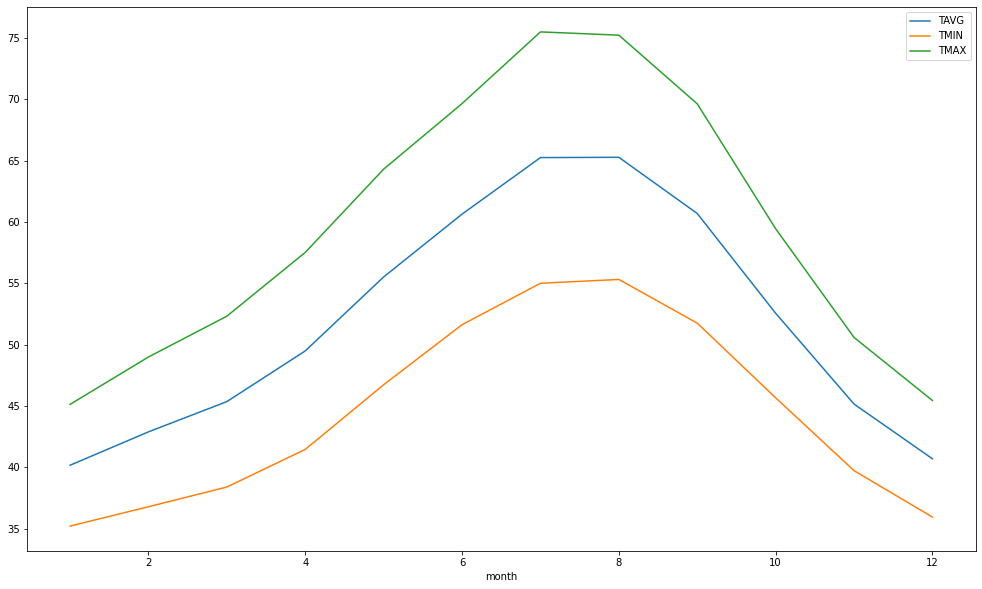

In [79]:
plot_rain = rain.groupby(['month']).mean()
plt.figure(figsize=(17,10))
plot_rain['TAVG'].plot()
plot_rain['TMIN'].plot()
plot_rain['TMAX'].plot()
plt.legend()



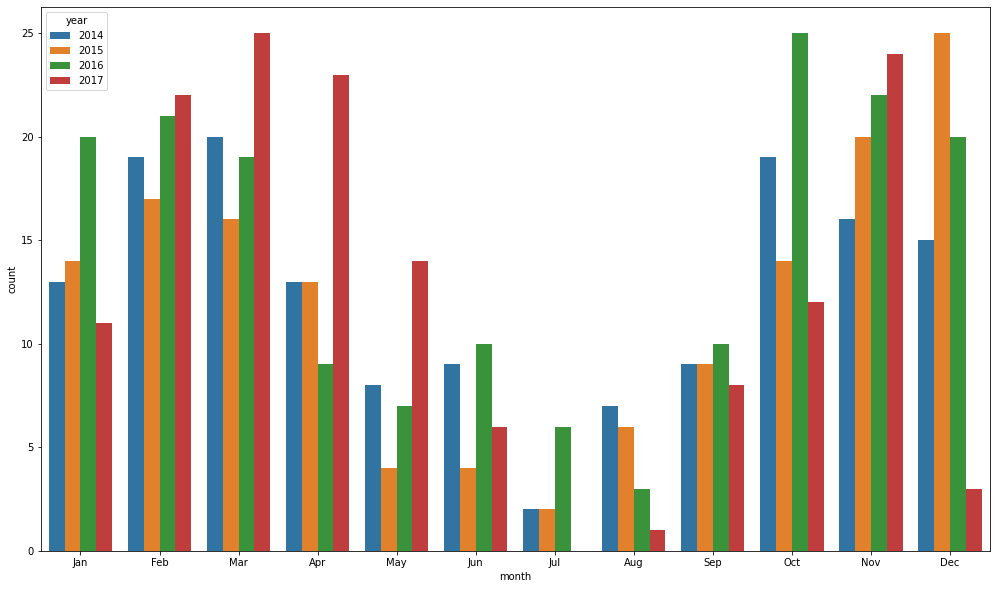

In [12]:
plt.figure(figsize=(17,10))
sns.countplot(data = rain[(rain['RAIN'] == 1) & (rain['year'] >= 2014)], x='month', hue='year')
plt.xticks(ticks=np.arange(0,12), labels=[ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'])
plt.show()

<Figure size 1224x720 with 0 Axes>

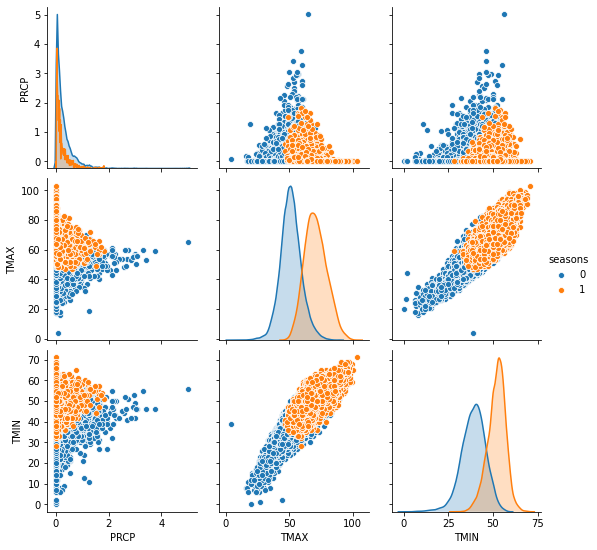

In [81]:
plt.figure(figsize=(17,10))
sns.pairplot(rain, vars = ['PRCP','TMAX','TMIN'], hue ='seasons')
plt.show()

# model

In [124]:
LR = LinearRegression().fit(scal_x_train, y_train)
KNN = KNeighborsRegressor(n_neighbors=11).fit(scal_x_train, y_train)

In [125]:
print(LR.score(scal_x_test, y_test))
print(KNN.score(scal_x_test, y_test))

0.6115495491368144
0.7912131886769594


In [85]:
y_test.loc[9170]

43.0

In [84]:
KNN.predict([[0.00,0,1973,2,8,0]])



array([51.2])

In [17]:
x_test

,PRCP,RAIN,year,month,day,seasons
4826,0.22,1,1961,3,19,0
9170,0.00,0,1973,2,8,0
21575,0.00,0,2007,1,29,0
2784,0.00,0,1955,8,16,1
2328,0.00,0,1954,5,17,1
...,...,...,...,...,...,...
18612,0.00,0,1998,12,18,0
21150,0.00,0,2005,11,30,0
20234,0.00,0,2003,5,28,1
17210,0.00,0,1995,2,13,0
